In [1]:
import pandas as pd

In [2]:
#This project revolves around using data from a manufacturing company's industrial devices. The data helps predict when these devices
#     need maintenance, preventing breakdowns and saving money. As companies grow, keeping track of maintenance manually becomes hard.
#      So, we propose a smart solution: using data from sensors to predict when maintenance is needed.

#The goal is to analyze the data from these sensors to figure out the best time to do maintenance on the devices. 
#    We'll use advanced techniques to do this efficiently.


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import missingno as msno

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
plt.rcdefaults()

In [9]:
df=pd.read_csv(r'C:/Users/DELL/Desktop/Important/Second Brain/project/predictive_maintenance.csv')

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [11]:
df.columns= ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Target', 'Failure Type'] 
df.describe().T


,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [12]:
df.select_dtypes( include=['object']).describe().T

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


In [13]:

num_columns= ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
cat_columns= ['Type', 'Failure Type']
label= 'Target'

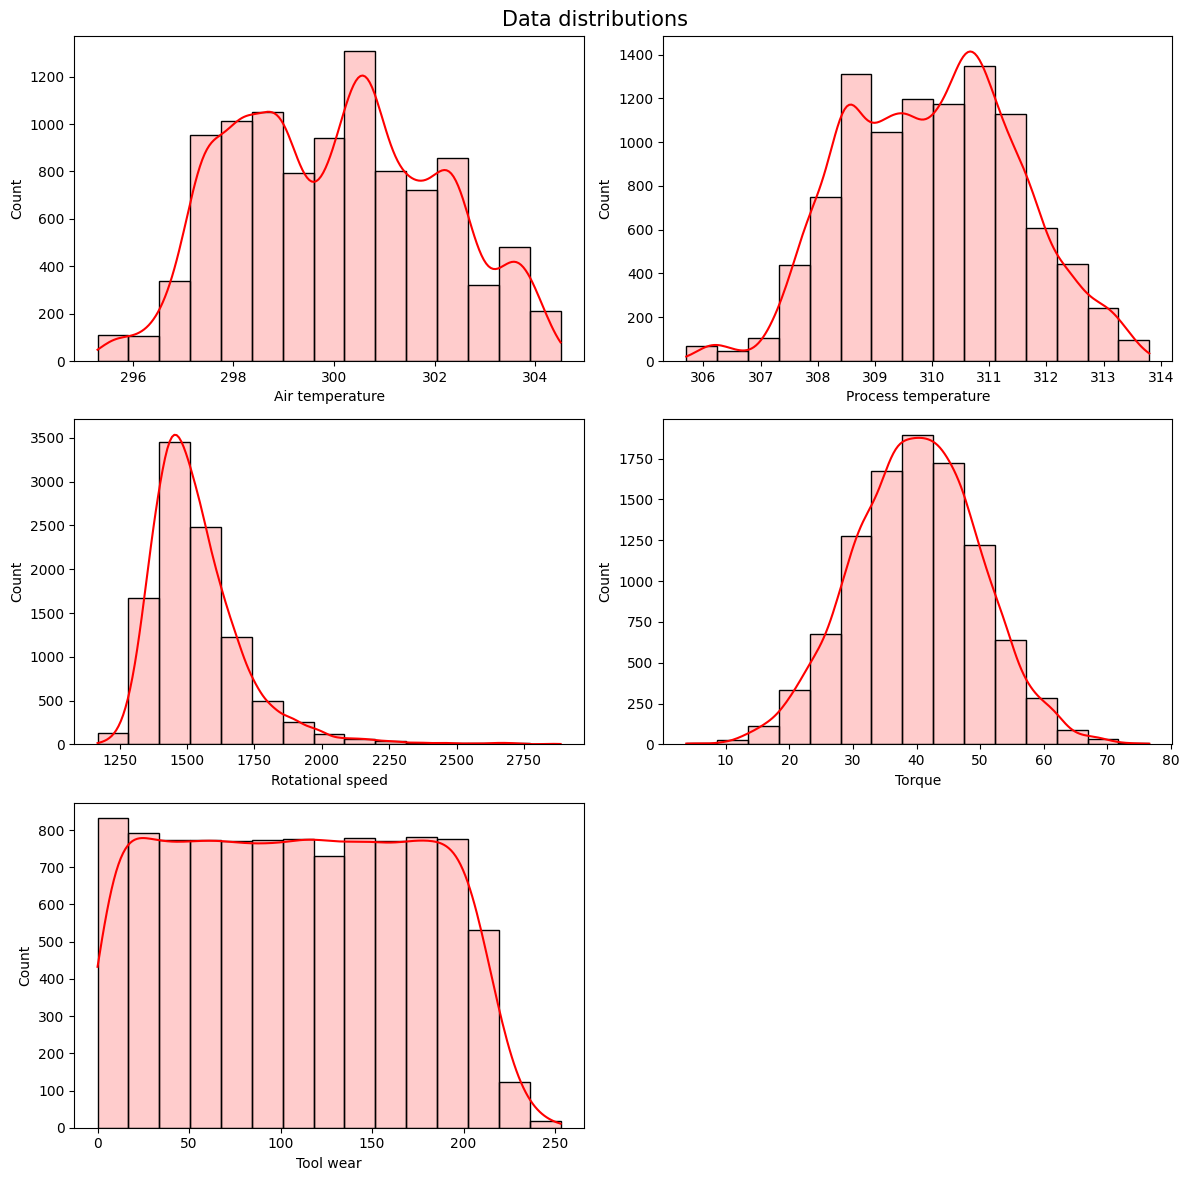

In [14]:
plt.figure(figsize=(12,12))
for i, col in enumerate(num_columns):
    plt.subplot(3,2, i+1)
    sns.histplot( df, x=col, kde=True, alpha=0.2, color='red', bins=15 )
plt.suptitle("Data distributions", fontsize=15)
plt.tight_layout()
plt.show()


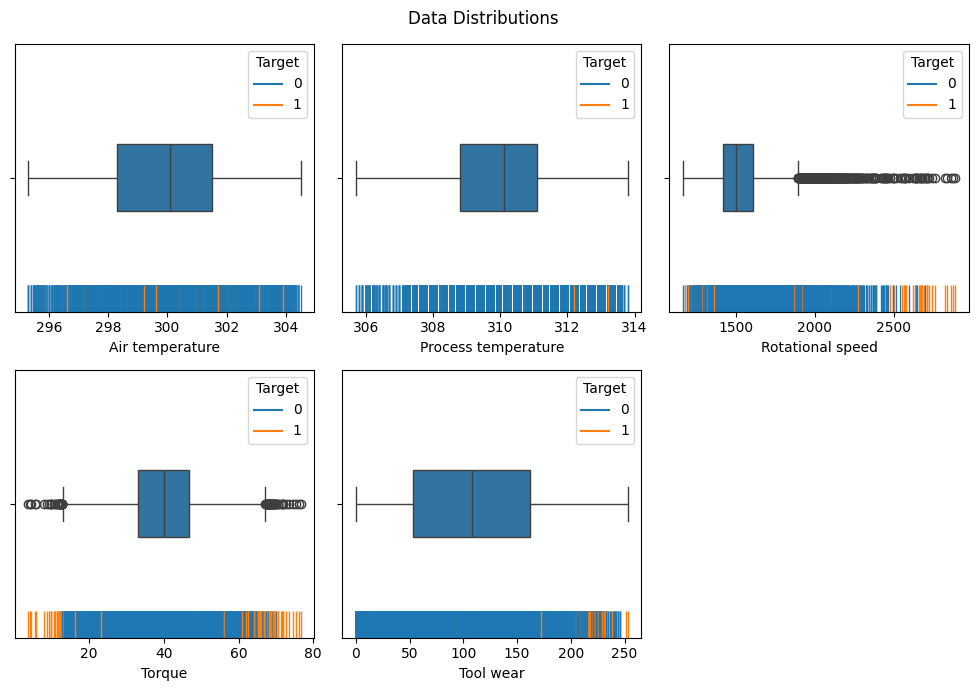

In [15]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_columns):
    plt.subplot(2,3, i+1)
    sns.rugplot(df, x = col, hue = label, height = 0.1)
    sns.boxplot(df, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

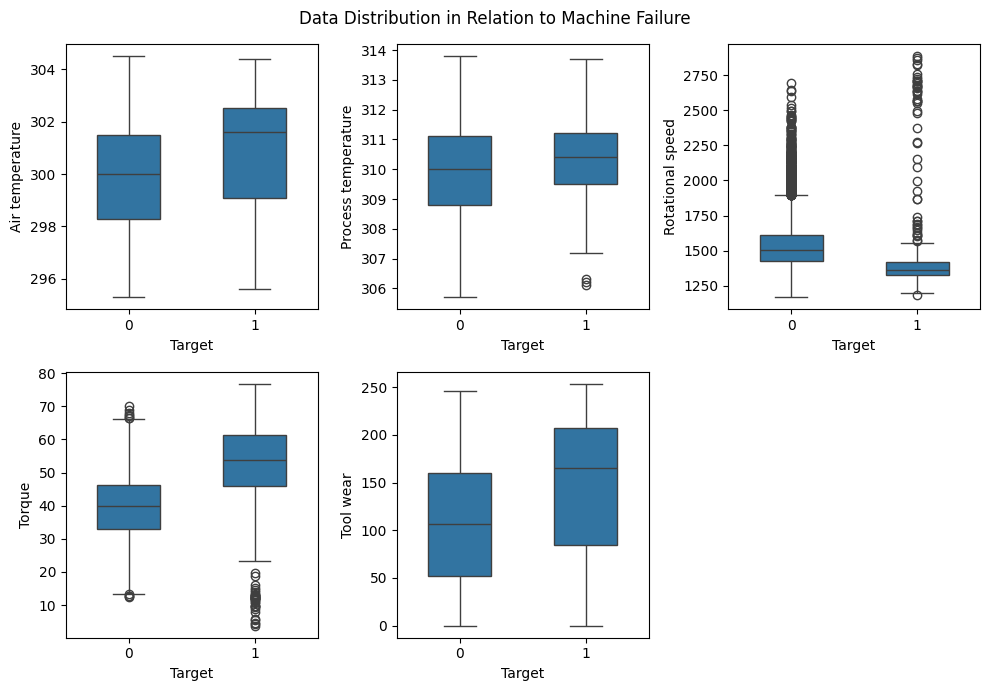

In [16]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(df, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

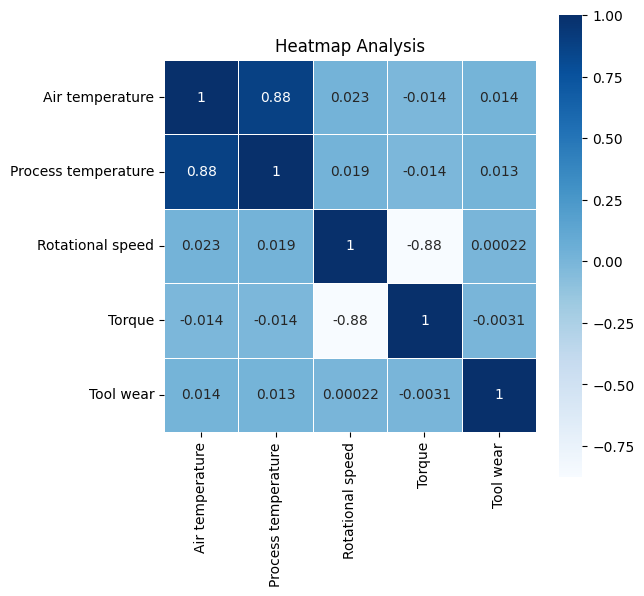

In [17]:
plt.figure(figsize = (6,6))
sns.heatmap(df[num_columns].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

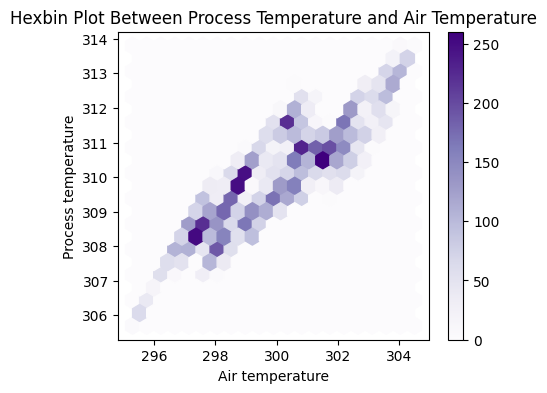

In [18]:
df.plot.hexbin(x='Air temperature', y='Process temperature', gridsize=20, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Process Temperature and Air Temperature")
plt.show()

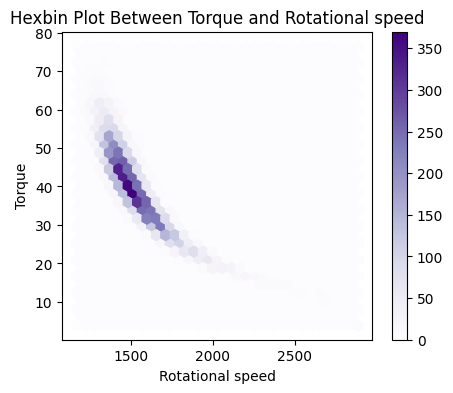

In [19]:
df.plot.hexbin(x='Rotational speed', y='Torque', gridsize=30, cmap='Purples', figsize = (5,4))
plt.title("Hexbin Plot Between Torque and Rotational speed")
plt.show()

In [20]:
type_machine_failure = df[['Type', 'Target']].pivot_table(index = 'Type', columns='Target', aggfunc= lambda x: len(x), margins = True)
type_machine_failure

Target,0,1,All
Type,,,
H,982,21,1003
L,5765,235,6000
M,2914,83,2997
All,9661,339,10000


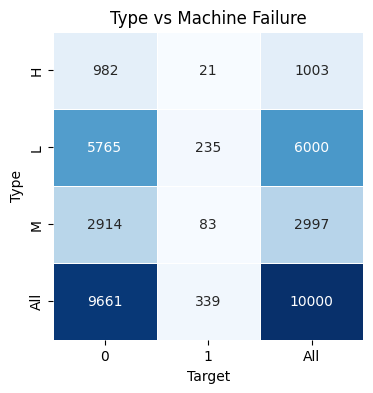

In [21]:
plt.figure(figsize=(4,4))
sns.heatmap(type_machine_failure, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Type vs Machine Failure")
plt.show()

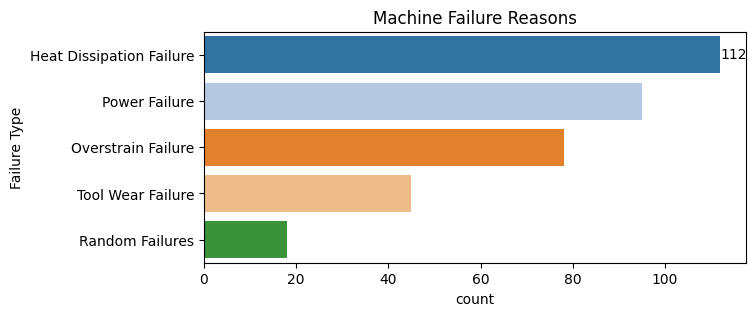

In [22]:
plt.figure(figsize = (7, 3)) 
ax = sns.countplot(df[df['Failure Type'] != 'No Failure'], y = "Failure Type", palette = 'tab20', order=df[df['Failure Type'] != 'No Failure']['Failure Type'].value_counts().index)
plt.title("Machine Failure Reasons")
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
#Feature Engineering
 #formula for calculating mechanical power in a rotating system
#Power (W)=2π×Rotational speed (RPM)×Torque (Nm)/60
#Units:

#Rotational speed: RPM.

#Torque: Nm.

#Power: Watts (W).

#Assumptions:

#The formula assumes that the rotational speed and torque are measured in the standard units mentioned above.

#If your dataset uses different units, you may need to adjust the formula.



In [24]:
df['Power'] = 2 * np.pi * df['Rotational speed'] * df['Torque'] / 60

In [25]:
# calculating the temperature difference for each row in the dataset using the formula:

#temp_diff=Process temperature−Air temperature

#The result is stored in a new column called 'temp_diff'.
#This calculation is particularly useful for:

#Analyzing the temperature gradient in your dataset.

#Identifying relationships between process and air temperatures.

#Creating new features for machine learning models



In [26]:
df['temp_diff'] = df['Process temperature'] - df['Air temperature']

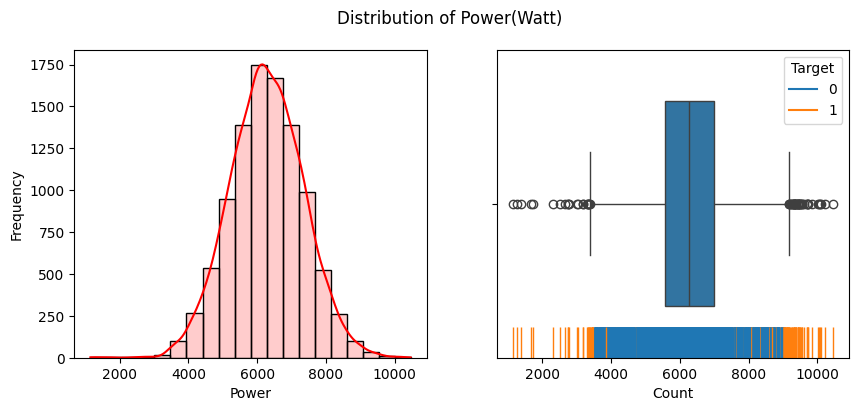

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(df['Power'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = df['Power'], ax = ax[1], width = 0.25)
sns.rugplot(df, x = 'Power', hue = 'Target', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Power(Watt)")

fig.show()

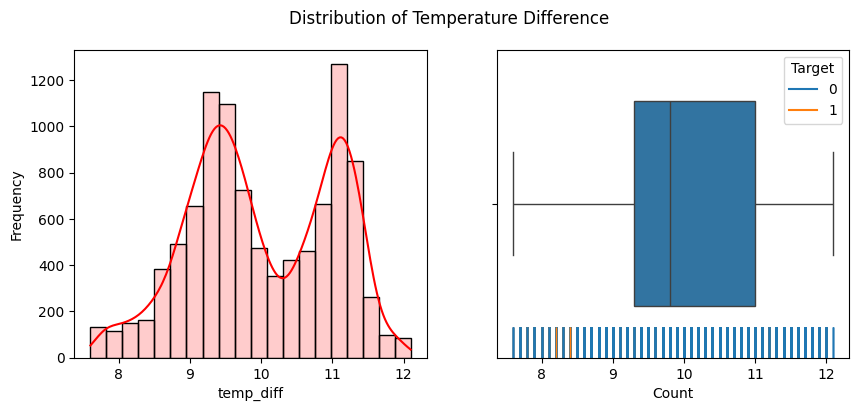

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.histplot(df['temp_diff'], bins = 20, ax = ax[0], color = 'red', alpha = 0.2, kde = True)
ax[0].set_ylabel("Frequency")

sns.boxplot(x = df['temp_diff'], ax = ax[1], width = 0.25)
sns.rugplot(df, x = 'temp_diff', hue = 'Target', ax = ax[1], height = 0.1)
ax[1].set_xlabel("Count")

fig.suptitle("Distribution of Temperature Difference")

fig.show()

In [29]:
#Data preprocessing

In [30]:
# UDI and Product ID are high cardinality features, Removing Process Temperature due to multi-collinearity
df = df.drop(['UDI', 'Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque'], axis = 1)

In [31]:
#One Hot Encoding

In [32]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   Tool wear  Target        Power  temp_diff  Type_L  Type_M  \
0          0       0  6951.590560       10.5   False    True   
1          3       0  6826.722724       10.5    True   False   
2          5       0  7749.387543       10.4    True   False   
3          7       0  5927.504659       10.4    True   False   
4          9       0  5897.816608       10.5    True   False   

   Failure Type_No Failure  Failure Type_Overstrain Failure  \
0                     True                            False   
1                     True                            False   
2                     True                            False   
3                     True                            False   
4                     True                            False   

   Failure Type_Power Failure  Failure Type_Random Failures  \
0                       False                         False   
1                       False                         False   
2                       False                  

In [33]:
df = df.astype(int)

In [34]:
#df[['Type_H', 'Type_L', 'Type_M']] = df[['Type_H', 'Type_L', 'Type_M']].astype('int')

In [35]:
df.head()

,Tool wear,Target,Power,temp_diff,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,0,0,6951,10,0,1,1,0,0,0,0
1,3,0,6826,10,1,0,1,0,0,0,0
2,5,0,7749,10,1,0,1,0,0,0,0
3,7,0,5927,10,1,0,1,0,0,0,0
4,9,0,5897,10,1,0,1,0,0,0,0


In [36]:
#Training Model

In [37]:
#Key Features of PyCaret
#Low-Code: Automates many steps in the machine learning workflow.

#Wide Range of Algorithms: Supports classification, regression, clustering, anomaly detection, and more.

#Model Comparison: Easily compare multiple models.

#Hyperparameter Tuning: Automatically tune model hyperparameters.
#Model Interpretation: Provides tools for interpreting model results (e.g., SHAP values).

#Model Deployment: Export models for deployment


In [38]:

if 'Target' in df.columns:
    print("Target column is present in the dataset. Ensure it's not used as a feature.")

Target column is present in the dataset. Ensure it's not used as a feature.


In [39]:
import pycaret

In [40]:
from pycaret.classification import *
#print(get_metrics())

In [41]:
#df['Target1'] = df[['Failure Type_Heat Dissipation Failure', 'Failure Type_No Failure', 'Failure Type_Overstrain Failure', 'Failure Type_Power Failure', 'Failure Type_Random Failures', 'Failure Type_Tool Wear Failure']].idxmax(axis=1)

In [42]:
print(df.columns)

Index(['Tool wear', 'Target', 'Power', 'temp_diff', 'Type_L', 'Type_M',
       'Failure Type_No Failure', 'Failure Type_Overstrain Failure',
       'Failure Type_Power Failure', 'Failure Type_Random Failures',
       'Failure Type_Tool Wear Failure'],
      dtype='object')


In [43]:
print("Original class distribution:")
print(df['Target'].value_counts())

Original class distribution:
Target
0    9661
1     339
Name: count, dtype: int64


In [44]:
#from imblearn.over_sampling import SMOTE
X = df.drop('Target', axis=1)
y = df['Target']

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
#X = df.drop('Target', axis=1)
#y = df['Target']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
Target
0    339
1    339
Name: count, dtype: int64


In [47]:
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Target'] = y_resampled

In [48]:
#print("Class distribution after SMOTE:")
#print(pd.Series(y_resampled).value_counts())

In [49]:
#print("Class distribution after SMOTE:")
#print(pd.Series(y_resampled).value_counts())

In [50]:
#s= setup( df, target = 'Target', session_id = 42, data_split_stratify=True)
#s= setup( df, target = 'Target', session_id = 42, data_split_stratify=True, fix_imbalance=True, fix_imbalance_method='class_weight')
#s= setup( df, target = 'Target', session_id = 42, data_split_stratify=True)
s = setup(df_balanced, target='Target', session_id=42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Binary
3,Original data shape,"(678, 11)"
4,Transformed data shape,"(678, 11)"
5,Transformed train set shape,"(474, 11)"
6,Transformed test set shape,"(204, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [51]:
#X_train = get_config('X_train')
#y_train = get_config('y_train')
#print("Class distribution after fixing imbalance:")
#print(y_train.value_counts())

In [52]:
best_model = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9894,0.9891,0.9786,1.0000,0.9889,0.9787,0.9795,15.1430
nb,Naive Bayes,0.9894,0.9915,0.9786,1.0000,0.9889,0.9787,0.9795,0.1260
ridge,Ridge Classifier,0.9894,0.9842,0.9786,1.0000,0.9889,0.9787,0.9795,0.0700
rf,Random Forest Classifier,0.9894,0.9874,0.9786,1.0000,0.9889,0.9787,0.9795,1.3690
lda,Linear Discriminant Analysis,0.9894,0.9841,0.9786,1.0000,0.9889,0.9787,0.9795,0.1720
et,Extra Trees Classifier,0.9894,0.9882,0.9786,1.0000,0.9889,0.9787,0.9795,0.9720
lightgbm,Light Gradient Boosting Machine,0.9894,0.9868,0.9786,1.0000,0.9889,0.9787,0.9795,16.0040
ada,Ada Boost Classifier,0.9831,0.9876,0.9786,0.9877,0.9827,0.9661,0.9670,0.6010
gbc,Gradient Boosting Classifier,0.9831,0.9908,0.9786,0.9875,0.9827,0.9661,0.9668,0.6050
dt,Decision Tree Classifier,0.9809,0.9809,0.9786,0.9835,0.9806,0.9619,0.9626,0.0820


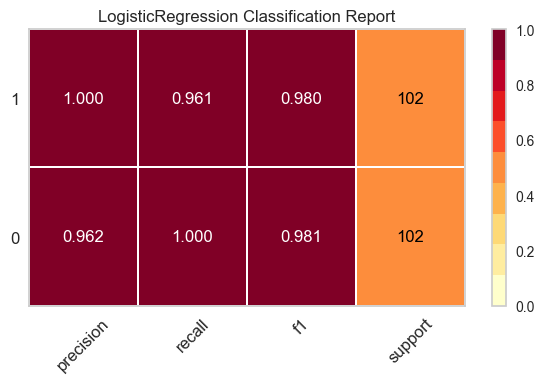

In [53]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

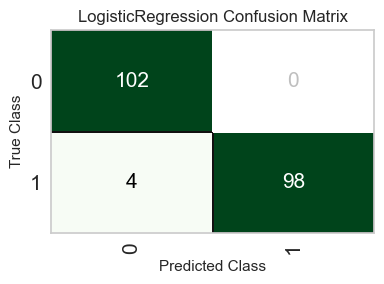

In [54]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

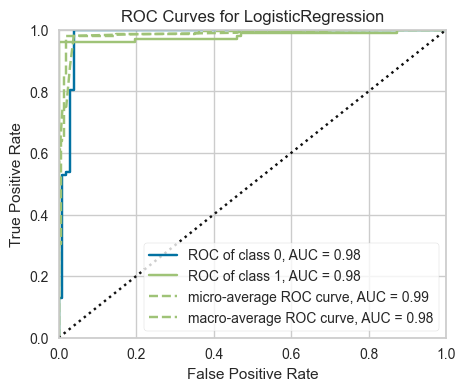

In [55]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

In [ ]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

In [ ]:
#Cost Benefit Analysis¶
#In the absence of specific cost data for this project, a basic cost-benefit analysis is performed using hypothetical values. While these values may not accurately reflect the exact costs associated with false positives and false negatives in this specific project, they can serve as placeholders for the purpose of understanding the concept and methodology of cost-benefit analysis.

#Hypothetical Cost Estimates (in USD):
#Cost of False Positive (Unnecessary Maintenance)
#Cost Type	Cost Amount
#Downtime Cost	$500 per hour
#Labor Cost	$200 per maintenance session
#Replacement Part Cost	$300 per occurrence
#Machine Wear	$50 per occurrence
#Production Disruption	$1000 per occurrence
#Cost of False Negative (Missed Maintenance Leading to Machine Failure)
#Cost Type	Cost Amount
#Downtime Cost	$2000 per hour
#Emergency Repair Cost	$1500 per occurrence
#Replacement Part Cost	$800 per occurrence
#Rework Cost	$1000 per occurrence
#Customer Satisfaction Loss	$5000 per occurrence


In [ ]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)
    
    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('custom_cost_benefit', 'Cost-Benefit', custom_cost_benefit)

Name                                                      Cost-Benefit
Display Name                                              Cost-Benefit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_cost_benefit, response_meth...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: custom_cost_benefit, dtype: object

In [ ]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.9894,0.9891,0.9786,1.0000,0.9889,0.9787,0.9795,0.0000,0.1030
knn,K Neighbors Classifier,0.7425,0.8232,0.7308,0.7556,0.7383,0.4853,0.4916,0.0000,0.0500
nb,Naive Bayes,0.9894,0.9915,0.9786,1.0000,0.9889,0.9787,0.9795,0.0000,0.0210
dt,Decision Tree Classifier,0.9809,0.9809,0.9786,0.9835,0.9806,0.9619,0.9626,0.0000,0.0210
svm,SVM - Linear Kernel,0.4895,0.6266,0.6542,0.4407,0.4522,-0.0126,-0.0025,0.0000,0.0260
ridge,Ridge Classifier,0.9894,0.9842,0.9786,1.0000,0.9889,0.9787,0.9795,0.0000,0.0280
rf,Random Forest Classifier,0.9894,0.9874,0.9786,1.0000,0.9889,0.9787,0.9795,0.0000,0.2240
qda,Quadratic Discriminant Analysis,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0360
ada,Ada Boost Classifier,0.9831,0.9876,0.9786,0.9877,0.9827,0.9661,0.9670,0.0000,0.1610
gbc,Gradient Boosting Classifier,0.9831,0.9908,0.9786,0.9875,0.9827,0.9661,0.9668,0.0000,0.1570


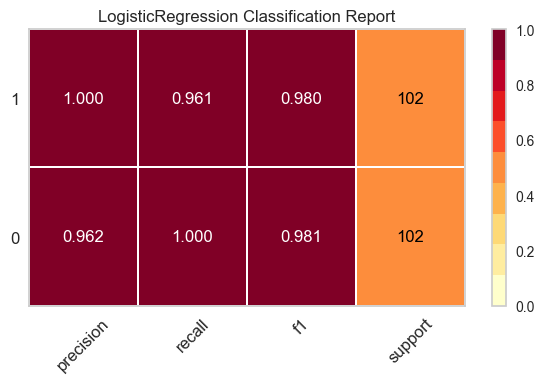

In [ ]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

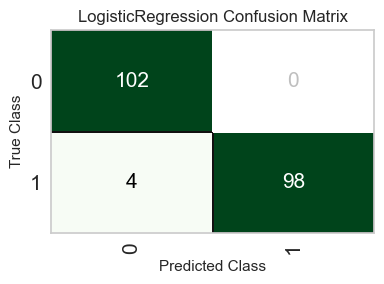

In [ ]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

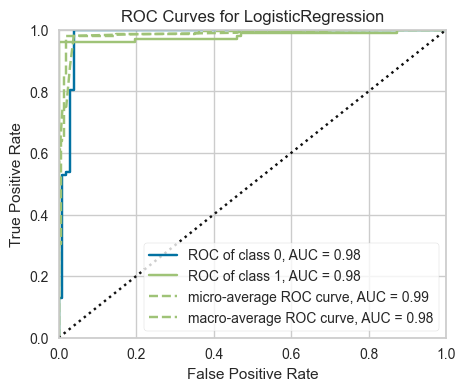

In [ ]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

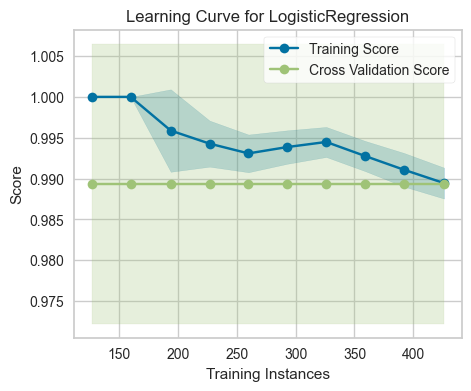

In [ ]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')

In [ ]:
save_model(best_model, 'predictive_maintenance')